# Pymaceuticals Inc.
---

### Analysis

- The Capomulin drug regimen seems to be the most effective of the lot, with tumor volumes dropping with progressing days of treatment.
- There is a positive correlation between mouse weight and tumor volume. This makes the results a bit questionable as the 2 most effective drug <br/>regimens are those with the least mouse weights on average: Capomulin and Ramicane with 20g mice, while other regimen groups all have <br/> 27g mice on average.
 

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path


In [169]:
# Study data files
mouse_metadata_path = Path(r'Resources\Mouse_metadata.csv')
study_results_path = Path(r'Resources\Study_results.csv')

# # Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner' )


# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [172]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [173]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [174]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [175]:
# Rearrange the columns for Mouse ID and Timepoint to be side by side

clean_df = clean_df[['Mouse ID','Timepoint','Drug Regimen','Sex',
                            'Age_months','Weight (g)','Tumor Volume (mm3)','Metastatic Sites']]

clean_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [176]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_group = clean_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_data = drug_regimen_group['Tumor Volume (mm3)'].mean()
median_data = drug_regimen_group['Tumor Volume (mm3)'].median()
variance = drug_regimen_group['Tumor Volume (mm3)'].var()
std_deviation = drug_regimen_group['Tumor Volume (mm3)'].std()
std_error_mean = drug_regimen_group['Tumor Volume (mm3)'].sem()


summary_table = pd.DataFrame({'Mean Tumor Volume': mean_data, 
                              'Median Tumor Volume': median_data,
                              'Tumor Volume Variance': variance,
                              'Tumor Volume Std. Dev.': std_deviation,
                              'Tumor Volume Std. Error': std_error_mean})
summary_table



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [178]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

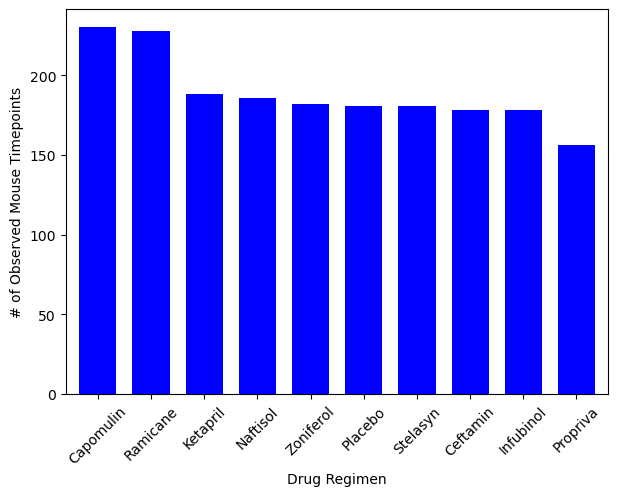

In [179]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

num_of_rows = pd.DataFrame(drug_regimen_group['Timepoint'].count().sort_values(ascending=False))

num_of_rows.plot(kind='bar', color= 'blue', figsize=(7,5), legend=None, width=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

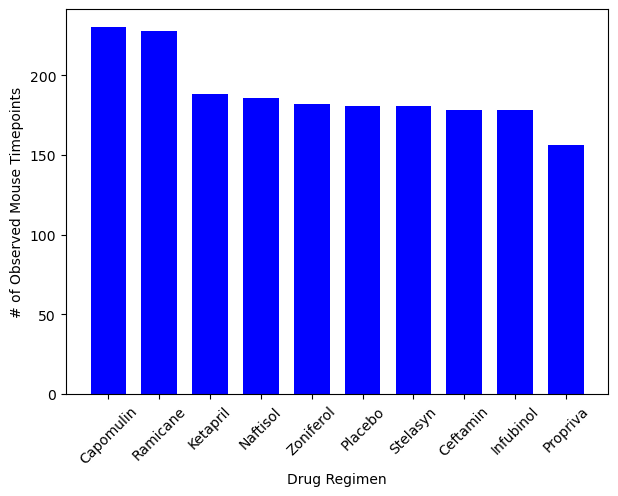

In [180]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(7,5))
plt.bar(num_of_rows.index, num_of_rows['Timepoint'], color='blue', width=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

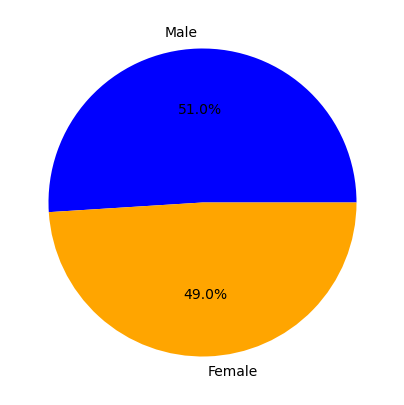

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

percent_distribution = round(clean_df['Sex'].value_counts(normalize=True)*100)

plt.figure(figsize=(5, 5))
percent_distribution.plot(kind='pie',autopct='%1.1f%%',colors=['blue','orange'])
plt.ylabel('')
plt.show()

## Quartiles, Outliers and Boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, clean_df, on=['Mouse ID','Timepoint'], how='inner')


# Filter for rows that only have the drug regimens of interest 
merged_df = merged_df.loc[(merged_df['Drug Regimen'] == 'Capomulin') |
                          (merged_df['Drug Regimen'] =='Ramicane') |
                          (merged_df['Drug Regimen'] =='Infubinol') |
                          (merged_df['Drug Regimen'] =='Ceftamin')]

In [183]:
# Put treatments into a list for for loop (and later for plot labels)
treatement_list = merged_df['Drug Regimen'].unique()

# creating an empty dictionary to store key value pairs (Drug Regimen: Tumor vol)
outliers_dict = {}

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Create a For loop to itirate and store values
for drug in treatement_list:
    drug_data = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    tumor_vols.append(drug_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = drug_data.quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]

    iqr = upper_q - lower_q

    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]

# Store the outlier results in outliers dictionary
    outliers_dict[drug] = outliers



# Print results
for drug, outliers in outliers_dict.items():
    print(f"{drug}'s potential outliers: {outliers}")

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [184]:
treatement_list

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

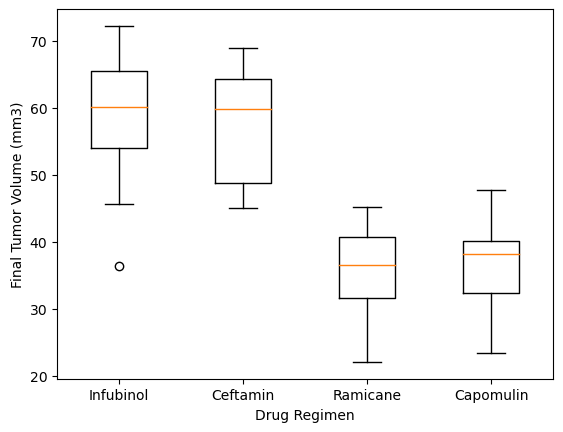

In [185]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vols, labels=treatement_list)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

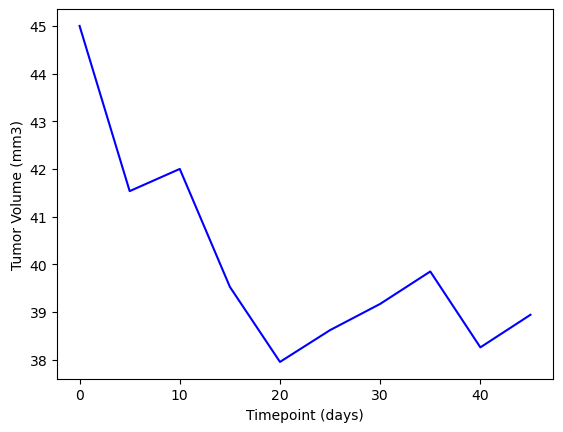

In [187]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

selected_mouse = clean_df.loc[clean_df['Mouse ID'] == 'b742']
selected_mouse

plt.plot(selected_mouse['Timepoint'],selected_mouse['Tumor Volume (mm3)'],linestyle='-',color='b')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

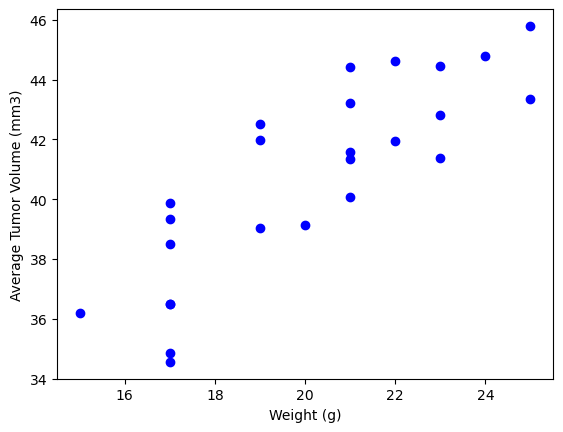

In [188]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_observation = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_avg = capomulin_observation.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
# capomulin_avg = capomulin_observation.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'],color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

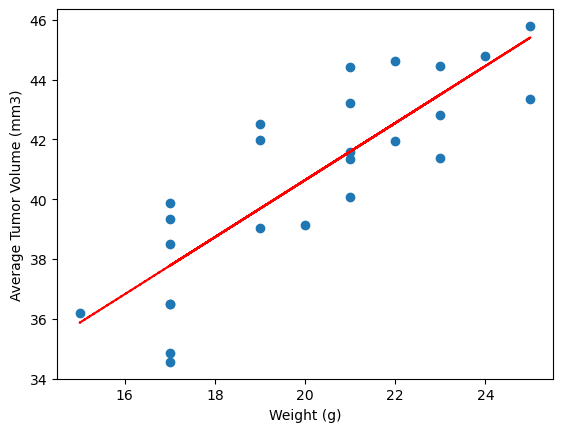

In [209]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#

d_slope, d_int, d_r, d_p, d_std_err = linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# Create linear regression line
d_fit = d_slope * capomulin_avg['Weight (g)'] + d_int

# Plot the scatter plot
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# Plot the linear regression line
plt.plot(capomulin_avg['Weight (g)'], d_fit, "--", color='red')

plt.xticks(np.arange(16,25,2))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [212]:
# Additional investigation to check if the population is representative in terms of weight of mice.

mean_data = drug_regimen_group['Weight (g)'].mean()

mean_data

Drug Regimen
Capomulin    19.965217
Ceftamin     27.398876
Infubinol    27.196629
Ketapril     27.861702
Naftisol     27.166667
Placebo      27.928177
Propriva     27.076923
Ramicane     19.679825
Stelasyn     27.856354
Zoniferol    27.692308
Name: Weight (g), dtype: float64